In [558]:
import numpy as np

from collections import Counter

import matplotlib.pyplot as plt

from utils import hartley_entropy, entropy, word_avg_len, plot_barchart
from text_parser import parse_text, split_into_n_grams

Select text

In [559]:
texts_root = 'texts/'

text_filename = 'en_three_texts_combined.txt'
# text_filename = 'en_1984_orwell.txt'
# text_filename = 'en_hamlet_shakespeare.txt'
# text_filename = 'en_war_and_peace_tolstoy.txt'


# text_filename = 'ru_three_texts_combined.txt'
# text_filename = 'ru_war_and_peace_tolstoy.txt'
# text_filename = 'ru_master_and_margarita_bulgakov.txt'
# text_filename = 'ru_doctor_zhivago_pasternak.txt'

text_path = texts_root + text_filename

text_language = text_filename[:text_filename.find('_')]

Setup

In [560]:
max_N = 6
split_overlap = True
remove_spaces = False

Parse text

In [561]:
text, words = parse_text(text_path, language=text_language, remove_spaces=remove_spaces)
print(f'Symbols: {len(text)}\nWords: {len(words)}')

Symbols: 3840171
Words: 724860


Dictionaries of words and letters

In [562]:
letter_dict = dict(Counter(text))
word_dict = dict(Counter(words))
print(f'Alphabet: {len(letter_dict)}')

Alphabet: 27


In [563]:
sorted_letters = sorted(letter_dict.items(), key=lambda x: x[1], reverse=True) 
sorted_words = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)

sorted_letters = list(map(lambda x: (x[0], x[1]/len(text)), sorted_letters))
sorted_words = list(map(lambda x: (x[0], x[1]/len(words)), sorted_words))

Letter frequencies and the most frequent words

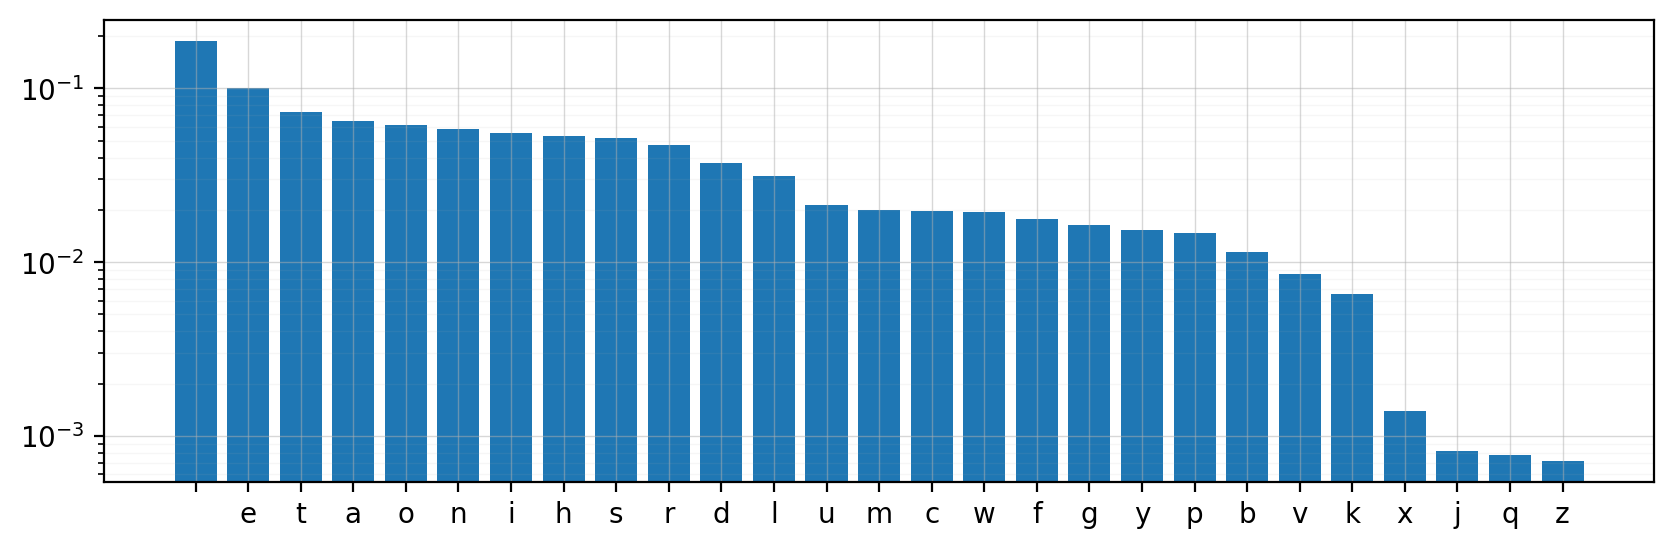

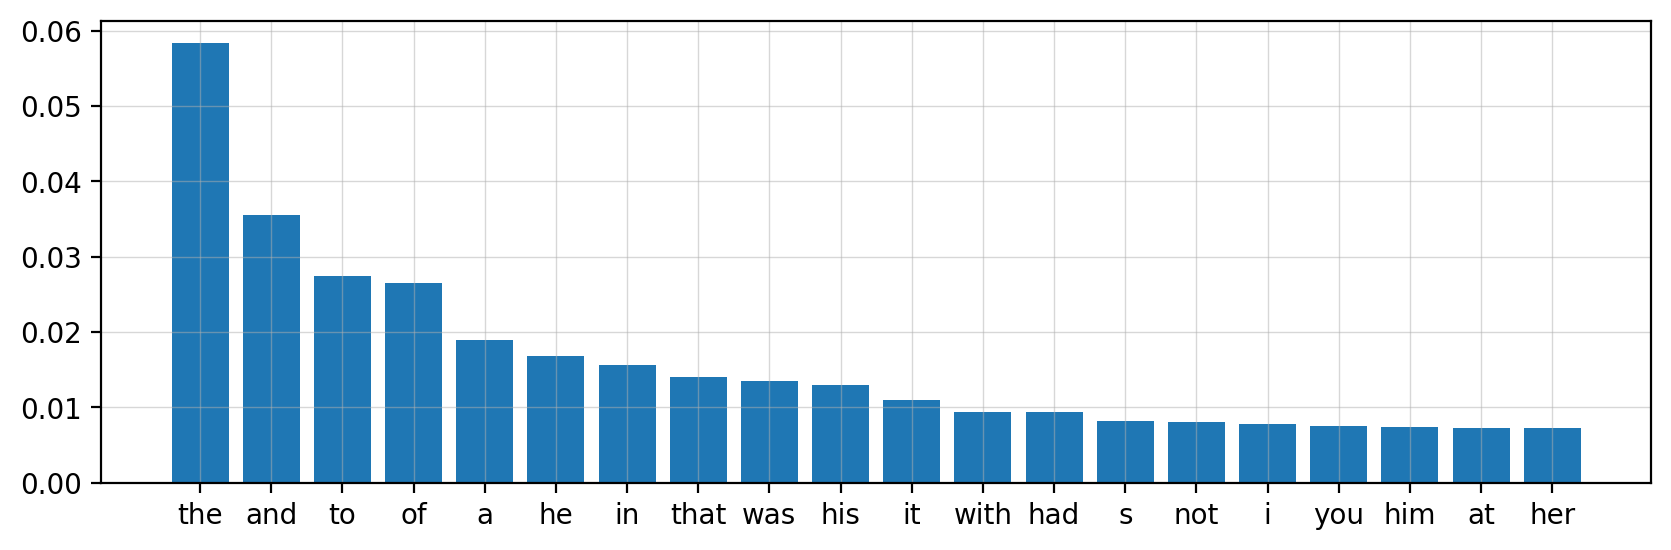

In [564]:
plot_barchart(sorted_letters, log=True)
plot_barchart(sorted_words, plot_first=20, log=False)

In [565]:
H_words = entropy(word_dict)
avg_len = word_avg_len(word_dict)
H_words_per_letter = H_words / avg_len 

print(f'Entropy of words: {H_words:.2f}\nAverage word length: {avg_len:.2f}\nEntropy per letter: {H_words_per_letter:.2f}')

Entropy of words: 9.73
Average word length: 4.30
Entropy per letter: 2.26


In [566]:
H0 = hartley_entropy(letter_dict)
H1 = entropy(letter_dict)

print(f'H0 = {H0:.2f}')

H0 = 4.75


In [567]:
letters_n_gramms_dict = {
    f'n={n}' : dict(Counter(split_into_n_grams(text, N=n, overlap=split_overlap))) if n != 1 else dict(Counter(text)) 
               for n in range(1, max_N+1)
}

In [568]:
Hn = {
    f'n={n}' : entropy(letters_n_gramms_dict[f'n={n}']) for n in range(1, max_N+1)
}

Fn = {
    f'n={n}' : Hn[f'n={n}'] - Hn[f'n={n-1}'] if n != 1 else Hn[f'n={n}'] for n in range(1, max_N+1)
}

In [569]:
print('H(X^n):')
print("\n".join(list((f'H(X^{n[2:]}) = '+str(round(h, 2)) for n, h in Hn.items()))))

H(X^n):
H(X^1) = 4.08
H(X^2) = 7.4
H(X^3) = 10.09
H(X^4) = 12.22
H(X^5) = 13.99
H(X^6) = 15.53


In [570]:
Hn_div_n = {k : v/int(k[2:]) for k, v in Hn.items()}

print('H_n:')
print("\n".join(list((f'H_{n[2:]} = '+str(round(h, 2)) for n, h in Hn_div_n.items()))))

H_n:
H_1 = 4.08
H_2 = 3.7
H_3 = 3.36
H_4 = 3.05
H_5 = 2.8
H_6 = 2.59


In [571]:
print('F_n:')
print("\n".join(list((f'F_{n[2:]} = '+str(round(h, 2)) for n, h in Fn.items()))))

F_n:
F_1 = 4.08
F_2 = 3.32
F_3 = 2.69
F_4 = 2.13
F_5 = 1.77
F_6 = 1.54


In [572]:
Fn_array = np.array(list(Fn.values()))
Hn_array = np.array(list(Hn_div_n.values()))

n = np.arange(1, max_N+1)

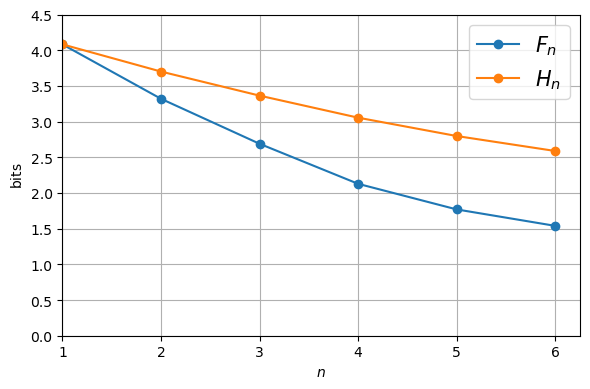

: 

In [575]:
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(n, Fn_array, marker='o', label=r'$F_n$')
plt.plot(n, Hn_array, marker='o', label=r'$H_n$')
plt.grid(True, 'major'); plt.grid(True, 'minor', lw=0.3, alpha=0.5)
plt.legend(fontsize=15)
plt.xlabel('$n$'); plt.ylabel(r'$\text{bits}$')
plt.xlim([1, None]); plt.ylim([0, None])
plt.yticks(ticks=np.linspace(0, 4.5, 10))
plt.tight_layout()
plt.show()